# 🚗 CAR CRASH SEVERITY PREDICTION USING ML

**Description:** Predicts the severity of car crashes (Minor, Severe, Fatal) based on vehicle, driver, and crash conditions using Random Forest, Gradient Boosting, XGBoost, and Neural Network models.

**Author:** PAIshanMadusha

**Date:** 2026/01/28

**Dataset:** Car Crash Dataset (4000+ records, 18 features)

**Source:** https://www.kaggle.com/competitions/car-crash-severity-prediction

# 1. PROJECT SETUP & DATA LOADING

In [342]:
# Install required packages for data analysis 
# Install visualization libraries
# Install scikit-learn for machine learning tasks
# Install imbalanced-learn for handling imbalanced datasets
# Install XGBoost for gradient boosting algorithms
!pip install pandas numpy seaborn scikit-learn imbalanced-learn xgboost

In [343]:
# Import pandas for data manipulation
import pandas as pd

In [344]:
# Load the dataset from a URL or local path
# url = "https://github.com/PAIshanMadusha/car-crash-severity-prediction-model/blob/development/dataset/car_crash_train.csv"
# or
url = "..\\dataset\\car_crash_train.csv"
data = pd.read_csv(url, encoding="latin-1")

# 2. EXPLORATORY DATA ANALYSIS (EDA)

In [345]:
# Display the first few rows of the dataset
data.head()

,Crash Speed (km/h),Impact Angle (degrees),Airbag Deployed,Seatbelt Used,Weather Conditions,Road Conditions,Crash Type,Vehicle Type,Vehicle Age (years),Brake Condition,Tire Condition,Driver Age,Driver Experience (years),Alcohol Level (BAC%),Distraction Level,Time of Day,Traffic Density,Visibility Distance (m),Severity
0,182,69,Yes,No,Clear,Dry,Rollover,Sedan,5,Good,Good,23,11,0.025314,NaN,Morning,Low,213,Minor Injury
1,192,73,Yes,No,Clear,Dry,Head-on,Truck,3,Good,Good,29,27,0.002372,Phone,Morning,Medium,426,Minor Injury
2,114,77,No,Yes,Clear,Dry,Head-on,Sedan,16,Good,Worn out,73,45,0.000483,NaN,Morning,Medium,175,Minor Injury
3,93,14,No,Yes,Clear,Dry,Rear-end,Truck,14,Worn out,Worn out,27,18,0.176578,NaN,Afternoon,Medium,82,Minor Injury
4,170,96,No,Yes,Clear,Dry,Side impact,SUV,15,Good,Good,70,27,0.065696,Other,Morning,Medium,96,Severe Injury


In [348]:
# Display the last few rows of the dataset
data.tail()

,Crash Speed (km/h),Impact Angle (degrees),Airbag Deployed,Seatbelt Used,Weather Conditions,Road Conditions,Crash Type,Vehicle Type,Vehicle Age (years),Brake Condition,Tire Condition,Driver Age,Driver Experience (years),Alcohol Level (BAC%),Distraction Level,Time of Day,Traffic Density,Visibility Distance (m),Severity
3995,36,13,Yes,Yes,Rain,Dry,Rear-end,SUV,8,Good,Good,61,17,0.035191,Phone,Night,Medium,485,Severe Injury
3996,29,67,Yes,Yes,Clear,Dry,Rear-end,Sedan,4,Worn out,Good,65,19,0.100765,NaN,Morning,Low,254,Severe Injury
3997,156,50,Yes,Yes,Rain,Dry,Head-on,SUV,4,Worn out,Worn out,63,35,0.007323,NaN,Night,High,409,Minor Injury
3998,143,23,No,Yes,Clear,Dry,Rear-end,Sedan,5,Worn out,Good,42,26,0.103523,Other,Night,Medium,374,Minor Injury
3999,128,115,Yes,Yes,Rain,Dry,Head-on,SUV,11,Good,Good,67,4,0.051655,Other,Afternoon,Medium,395,Minor Injury


In [349]:
# Display the shape of the dataset(number of rows and columns)
data.shape

(4000, 19)

In [350]:
# Display the count of non-null entries in each column
data.count()

Crash Speed (km/h)           4000
Impact Angle (degrees)       4000
Airbag Deployed              4000
Seatbelt Used                4000
Weather Conditions           4000
Road Conditions              4000
Crash Type                   4000
Vehicle Type                 4000
Vehicle Age (years)          4000
Brake Condition              4000
Tire Condition               4000
Driver Age                   4000
Driver Experience (years)    4000
Alcohol Level (BAC%)         4000
Distraction Level            1640
Time of Day                  4000
Traffic Density              4000
Visibility Distance (m)      4000
Severity                     4000
dtype: int64

In [351]:
# Display summary information about the dataset
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crash Speed (km/h)         4000 non-null   int64  
 1   Impact Angle (degrees)     4000 non-null   int64  
 2   Airbag Deployed            4000 non-null   str    
 3   Seatbelt Used              4000 non-null   str    
 4   Weather Conditions         4000 non-null   str    
 5   Road Conditions            4000 non-null   str    
 6   Crash Type                 4000 non-null   str    
 7   Vehicle Type               4000 non-null   str    
 8   Vehicle Age (years)        4000 non-null   int64  
 9   Brake Condition            4000 non-null   str    
 10  Tire Condition             4000 non-null   str    
 11  Driver Age                 4000 non-null   int64  
 12  Driver Experience (years)  4000 non-null   int64  
 13  Alcohol Level (BAC%)       4000 non-null   float64
 14  Dis

In [352]:
# Statistical summary for numerical features
data.describe()

,Crash Speed (km/h),Impact Angle (degrees),Vehicle Age (years),Driver Age,Driver Experience (years),Alcohol Level (BAC%),Visibility Distance (m)
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,110.999750,89.979750,9.445500,48.698750,24.723000,0.101216,247.583500
std,52.227839,51.301514,5.718147,17.815972,14.211818,0.057820,143.478155
min,20.000000,0.000000,0.000000,18.000000,0.000000,0.000054,10.000000
25%,66.000000,45.000000,5.000000,34.000000,13.000000,0.050630,120.000000
50%,112.000000,89.500000,9.000000,49.000000,25.000000,0.101574,244.000000
75%,157.000000,134.000000,14.000000,64.000000,37.000000,0.151783,372.000000
max,199.000000,179.000000,19.000000,79.000000,49.000000,0.199936,499.000000


# 3. EDA VISUALIZATIONS & INSIGHTS

In [375]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [354]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#### MISSING VALUES ANALYSIS

In [355]:
# Missing values analysis 
missing_values = data.isnull().sum()
# Get percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("\n", missing_df)


                Column  Missing_Count  Missing_Percentage
14  Distraction Level           2360                59.0


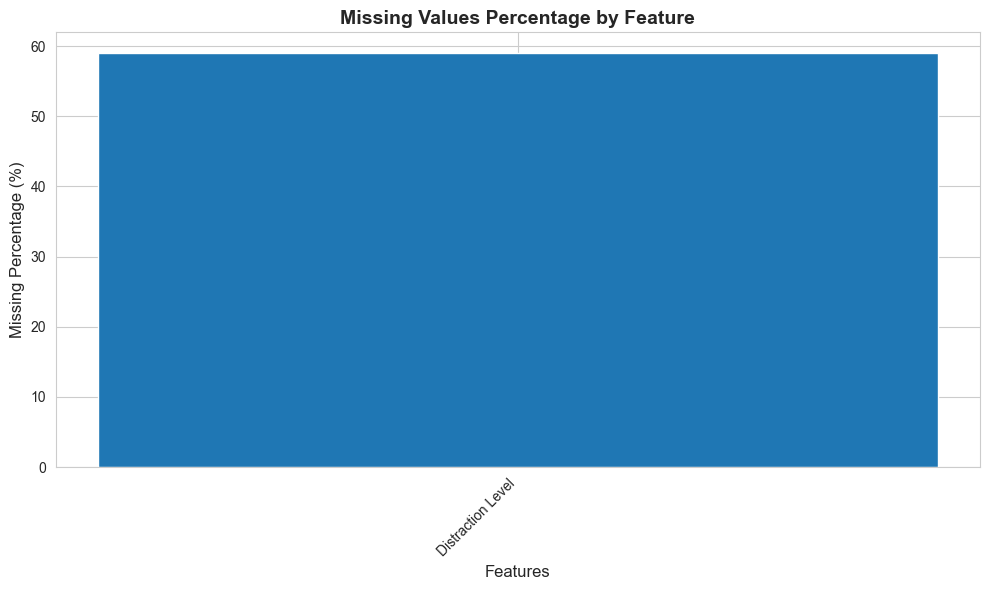

In [356]:
# Visualize missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_df['Column'], missing_df['Missing_Percentage'])
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### TARGET VARIABLE ANALYSIS (Severity)

In [357]:
# Analyze the target variable 'Severity'
severity_counts = data['Severity'].value_counts()

# Display severity distribution
print("\nSeverity Distribution:")
print(severity_counts)

# Display severity percentages
print("\nSeverity Percentages:")
print(data['Severity'].value_counts(normalize=True) * 100)


Severity Distribution:
Severity
Minor Injury     2756
Severe Injury    1038
Fatal             206
Name: count, dtype: int64

Severity Percentages:
Severity
Minor Injury     68.90
Severe Injury    25.95
Fatal             5.15
Name: proportion, dtype: float64


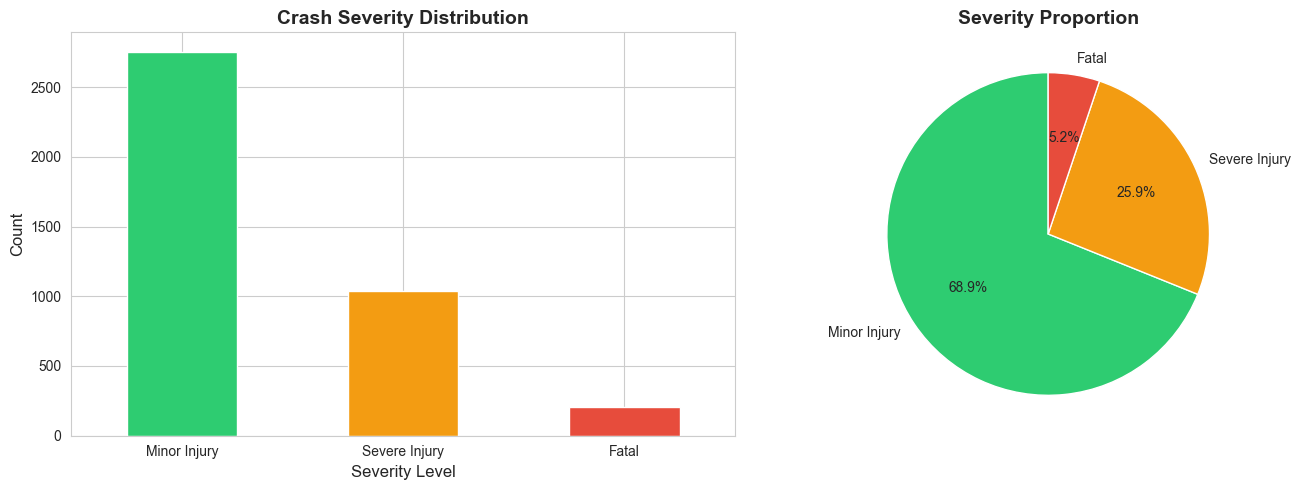

In [358]:
# Visualize severity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for severity distribution
severity_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_title('Crash Severity Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Severity Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Pie chart for severity proportion
axes[1].pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', 
            colors=['#2ecc71', '#f39c12', '#e74c3c'], startangle=90)
axes[1].set_title('Severity Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### NUMERICAL FEATURES ANALYSIS

In [359]:
# List of numerical columns for further analysis
numerical_cols = ['Crash Speed (km/h)', 'Impact Angle (degrees)', 
                  'Vehicle Age (years)', 'Driver Age', 
                  'Driver Experience (years)', 'Alcohol Level (BAC%)', 
                  'Visibility Distance (m)']

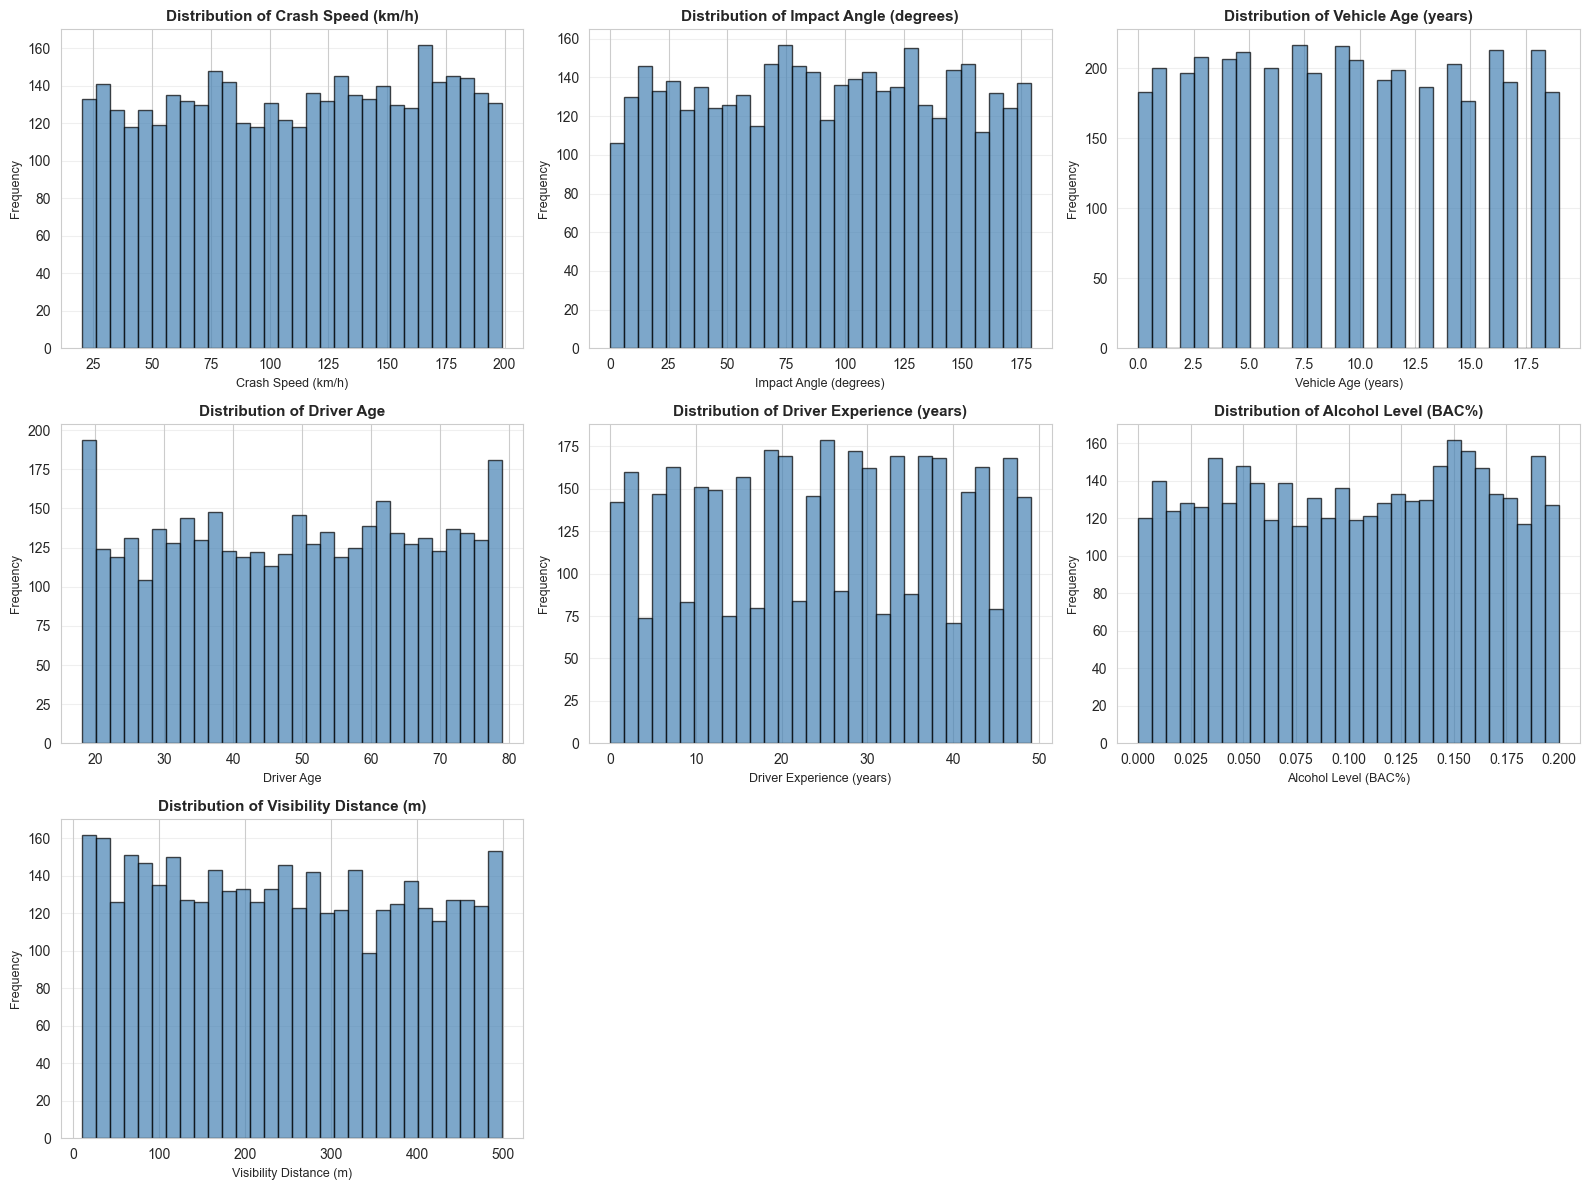

In [360]:
# Distribution plots to visualize spread of numerical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

# Plot histograms for each numerical column
for idx, col in enumerate(numerical_cols):
    axes[idx].hist(data[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

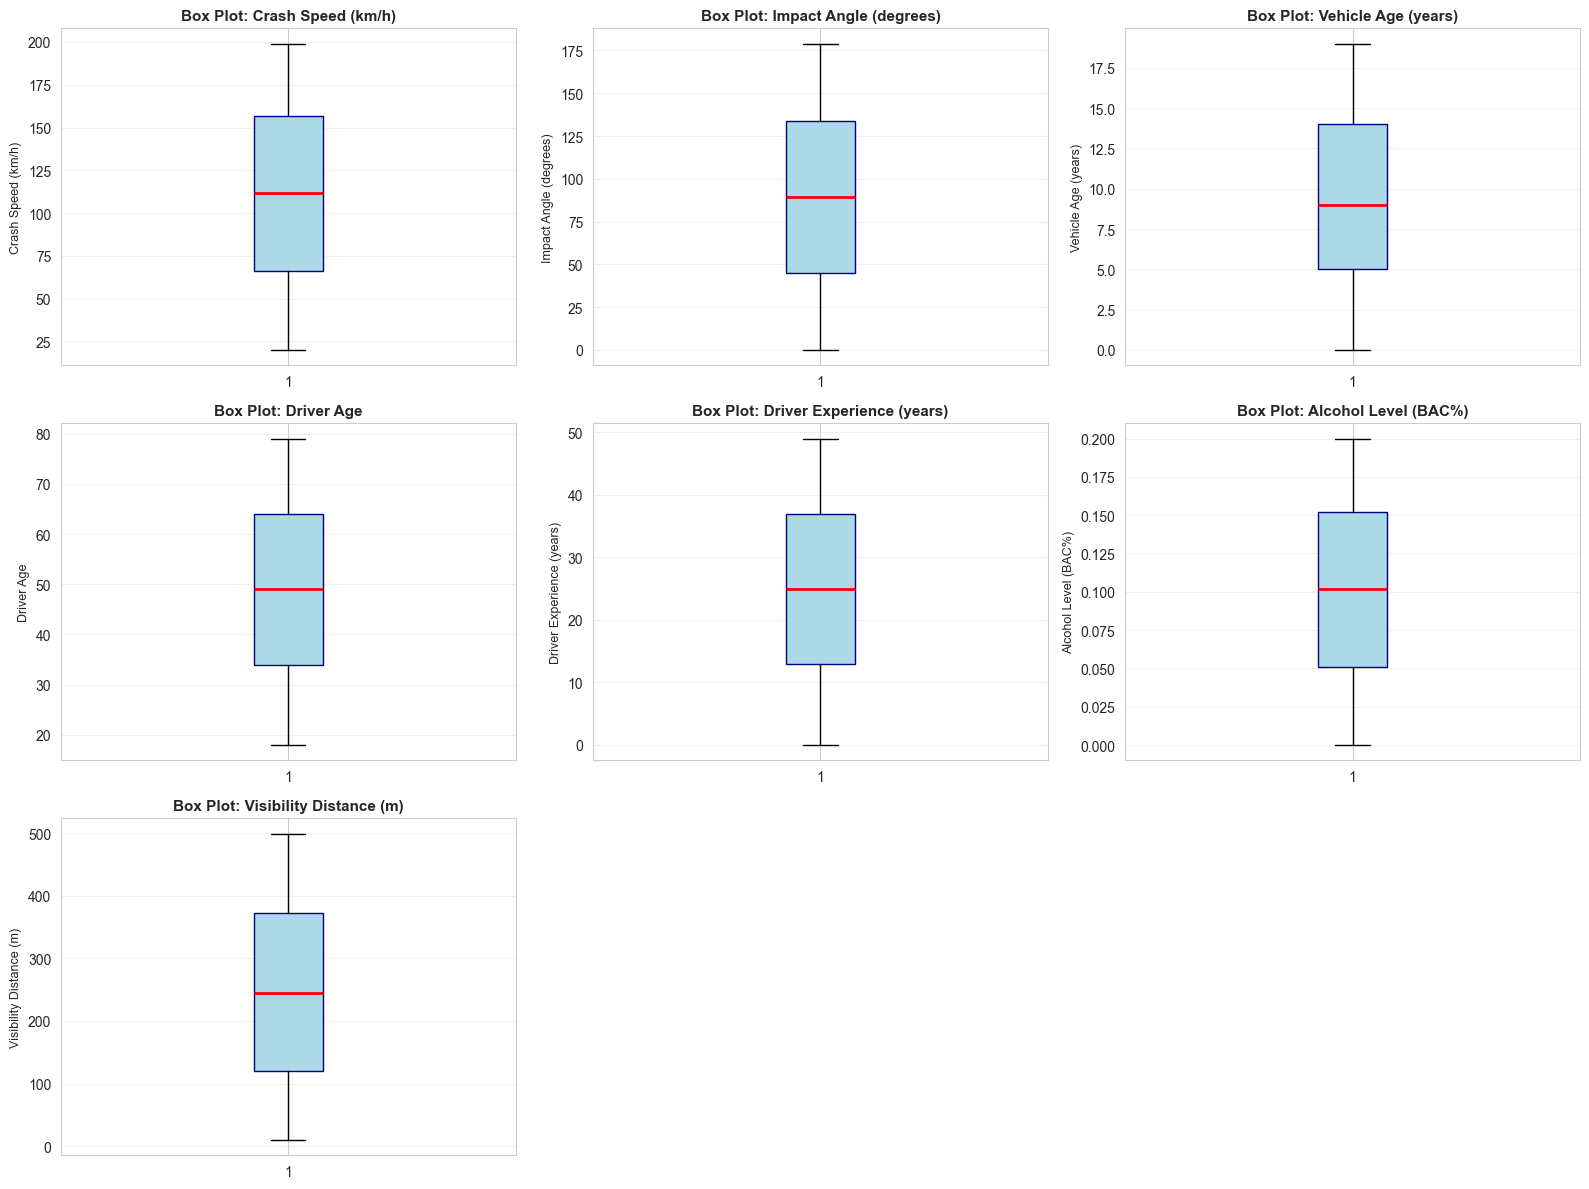

In [361]:
# Box plots to detect outliers
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

# Plot box plots for each numerical column
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(data[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='navy'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

#### CATEGORICAL FEATURES ANALYSIS

In [362]:
# List of categorical columns for further analysis
categorical_cols = ['Airbag Deployed', 'Seatbelt Used', 'Weather Conditions', 
                    'Road Conditions', 'Crash Type', 'Vehicle Type', 
                    'Brake Condition', 'Tire Condition', 'Distraction Level',
                    'Time of Day', 'Traffic Density']

In [363]:
# Value counts for each categorical feature
for col in categorical_cols:
    print(f"\nCategory | Value Counts:")
    print(data[col].value_counts())
    print(f"Unique values: {data[col].nunique()}")


Category | Value Counts:
Airbag Deployed
Yes    2817
No     1183
Name: count, dtype: int64
Unique values: 2

Category | Value Counts:
Seatbelt Used
Yes    3174
No      826
Name: count, dtype: int64
Unique values: 2

Category | Value Counts:
Weather Conditions
Clear    2345
Rain      846
Snow      421
Fog       388
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Road Conditions
Dry       2792
Wet        603
Icy        395
Uneven     210
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Crash Type
Side impact    1413
Rear-end       1175
Head-on        1020
Rollover        392
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Vehicle Type
Sedan         1644
SUV           1207
Truck          751
Motorcycle     398
Name: count, dtype: int64
Unique values: 4

Category | Value Counts:
Brake Condition
Good        3369
Worn out     631
Name: count, dtype: int64
Unique values: 2

Category | Value Counts:
Tire Condition
Good        3225


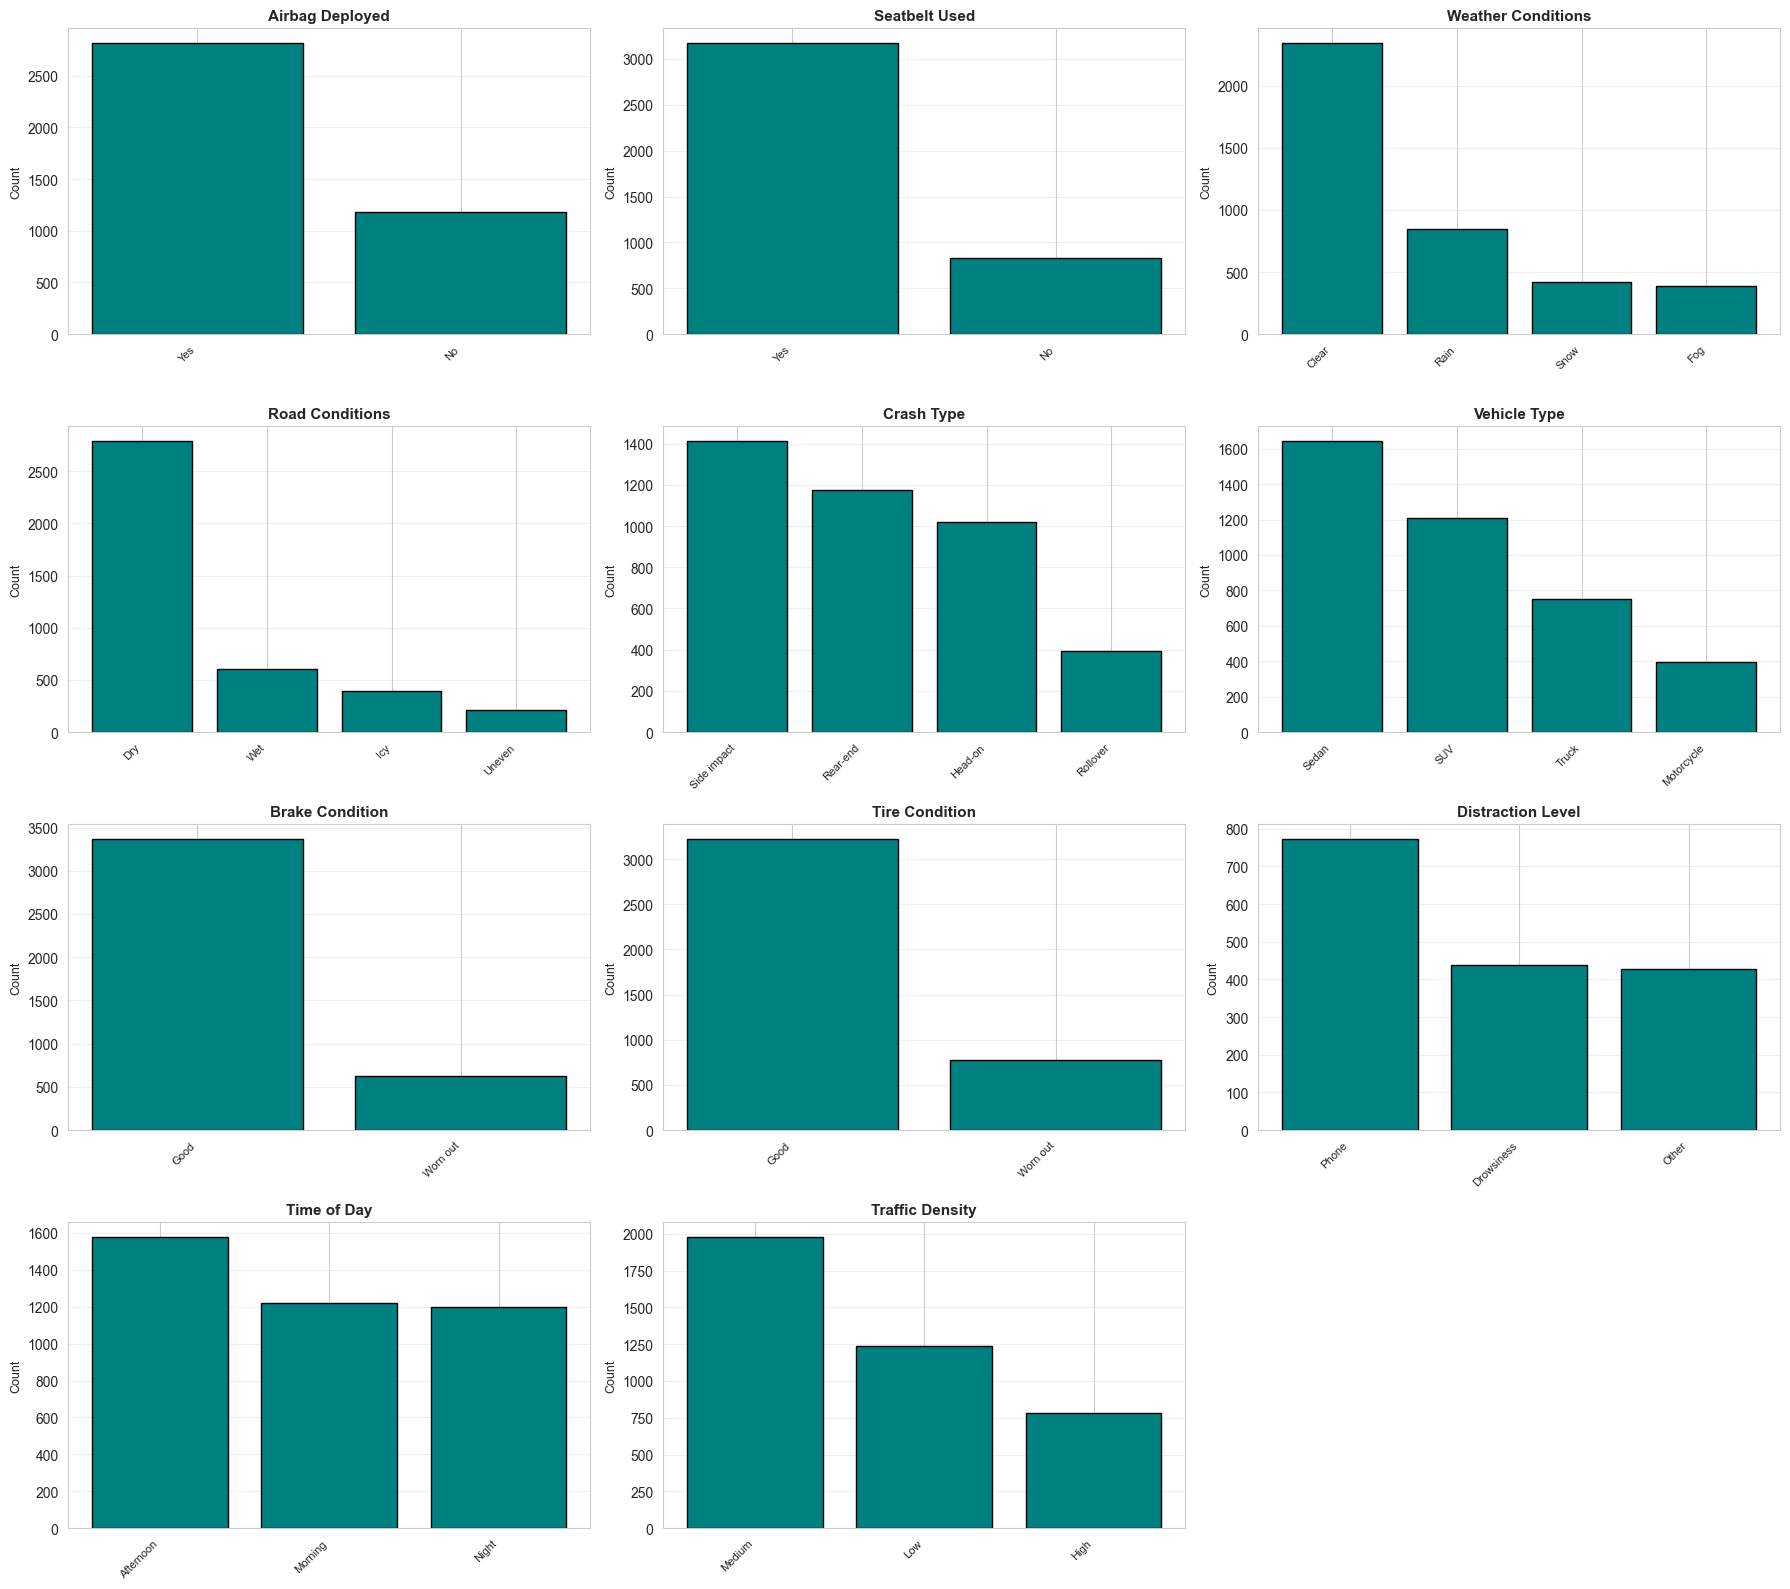

In [364]:
# Visualize distributions of categorical features
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

# Loop to plot bar charts for each categorical column
for idx, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='teal', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
    axes[idx].set_ylabel('Count', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

#### CORRELATION ANALYSIS

In [365]:
# Select only numerical columns for correlation
numerical_data = data[numerical_cols]

In [366]:
# Correlation matrix for numerical features
correlation_matrix = numerical_data.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Crash Speed (km/h),Impact Angle (degrees),Vehicle Age (years),Driver Age,Driver Experience (years),Alcohol Level (BAC%),Visibility Distance (m)
Crash Speed (km/h),1.000000,-0.005584,-0.010336,0.020510,0.012986,0.008647,0.021176
Impact Angle (degrees),-0.005584,1.000000,0.011143,-0.010786,-0.009410,-0.000190,0.012599
Vehicle Age (years),-0.010336,0.011143,1.000000,0.021313,-0.005038,0.011471,0.000913
Driver Age,0.020510,-0.010786,0.021313,1.000000,-0.000902,0.021403,-0.008727
Driver Experience (years),0.012986,-0.009410,-0.005038,-0.000902,1.000000,0.006127,0.003922
Alcohol Level (BAC%),0.008647,-0.000190,0.011471,0.021403,0.006127,1.000000,-0.016173
Visibility Distance (m),0.021176,0.012599,0.000913,-0.008727,0.003922,-0.016173,1.000000


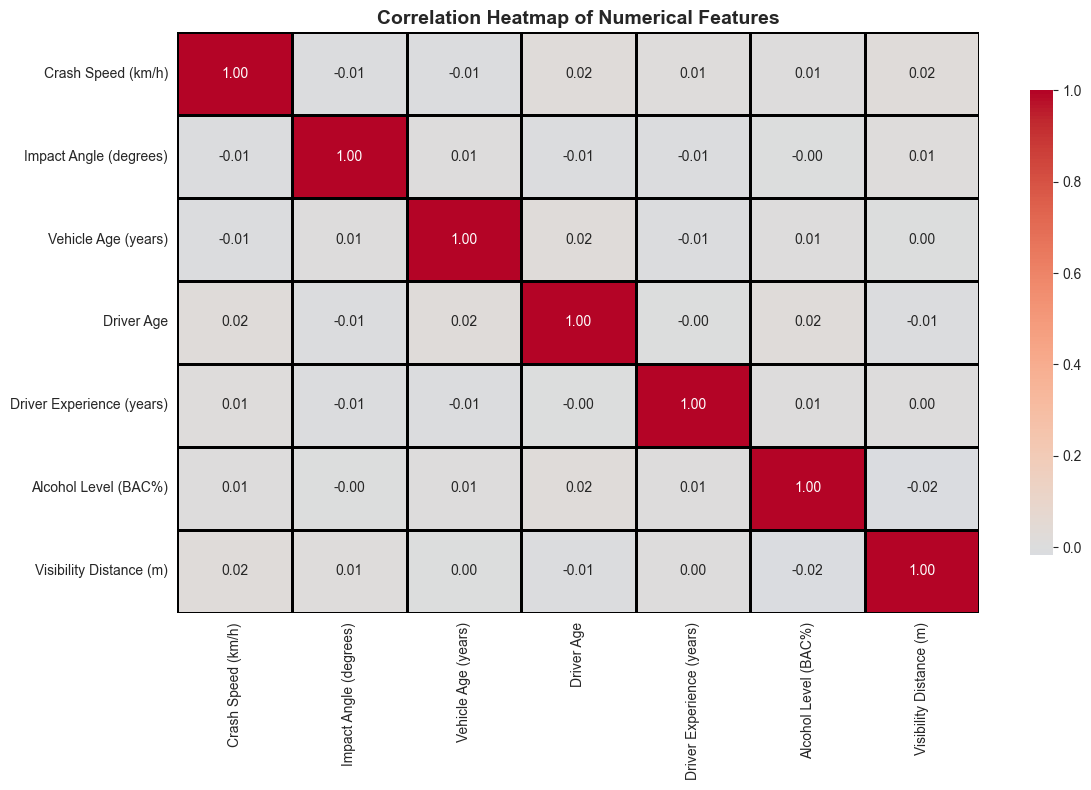

In [367]:
# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=1, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### BIVARIATE ANALYSIS WITH TARGET

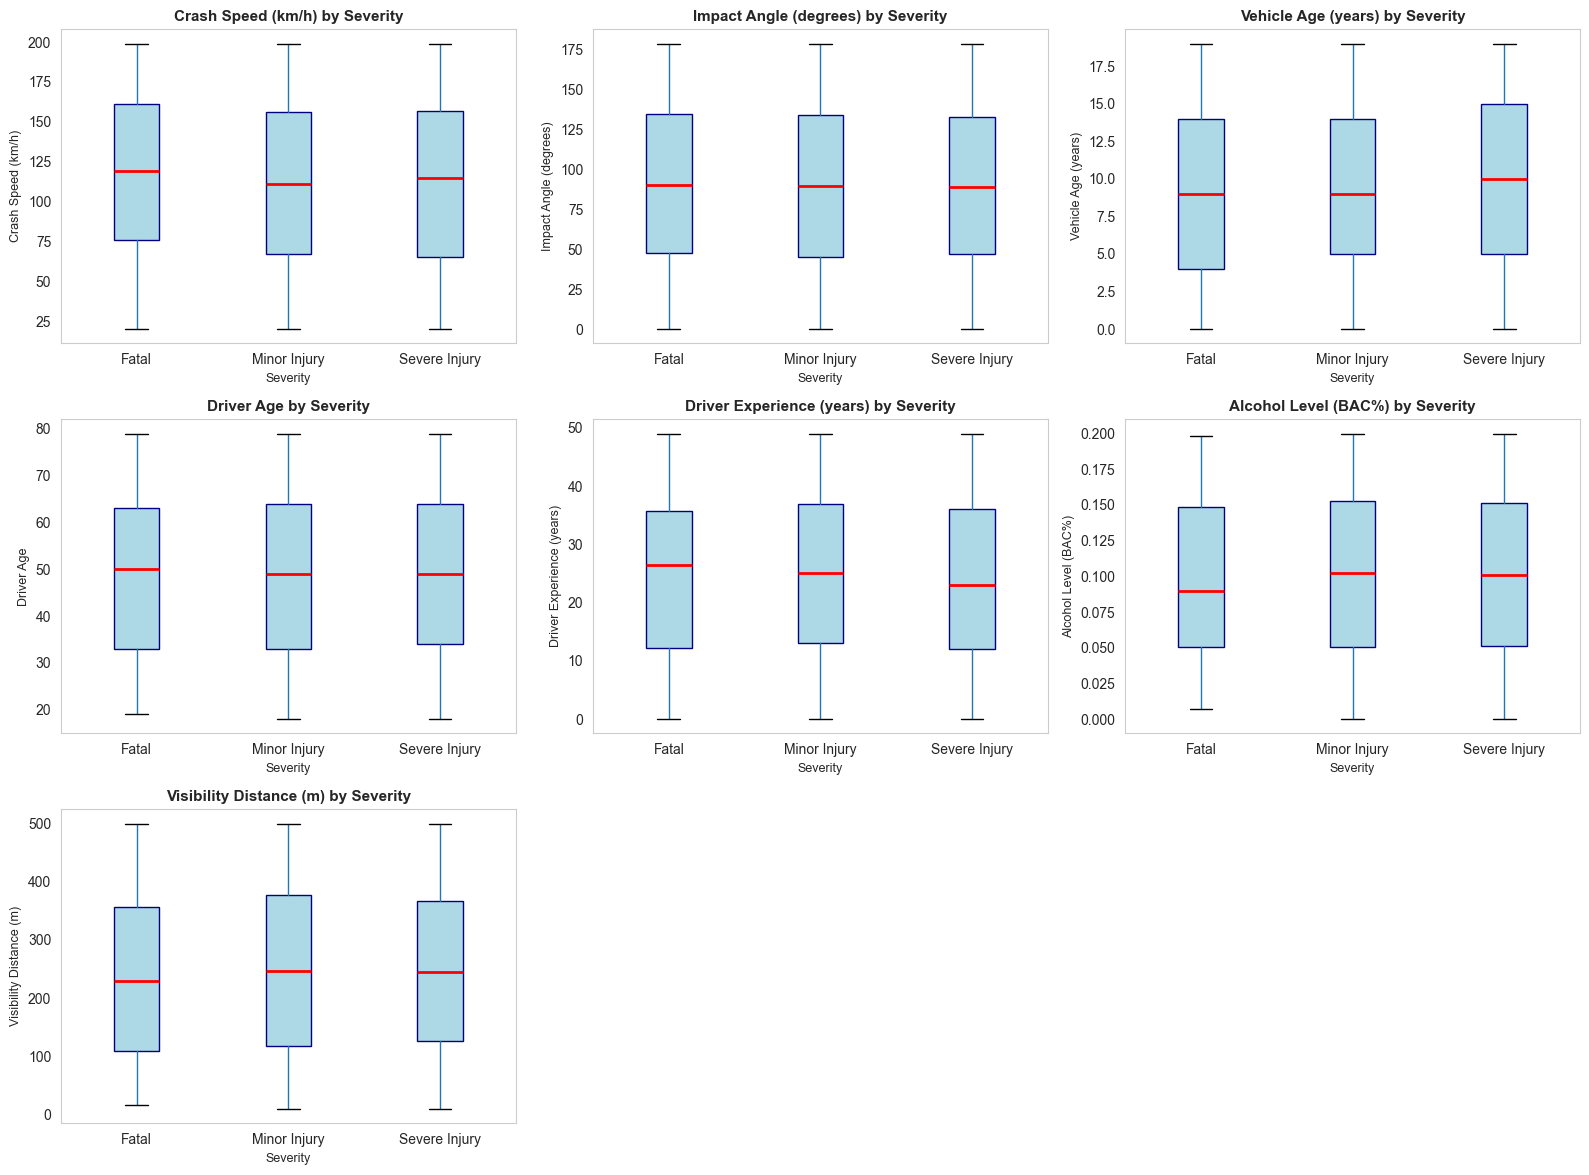

In [368]:
# Numerical features vs Severity
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

# Box plots of numerical features grouped by Severity
for idx, col in enumerate(numerical_cols):
    data.boxplot(column=col, by='Severity', ax=axes[idx], 
                 patch_artist=True, grid=False,
                 boxprops=dict(facecolor='lightblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col} by Severity', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Severity', fontsize=9)
    axes[idx].set_ylabel(col, fontsize=9)
    plt.sca(axes[idx])
    plt.xticks(rotation=0)

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('')
plt.tight_layout()
plt.show()

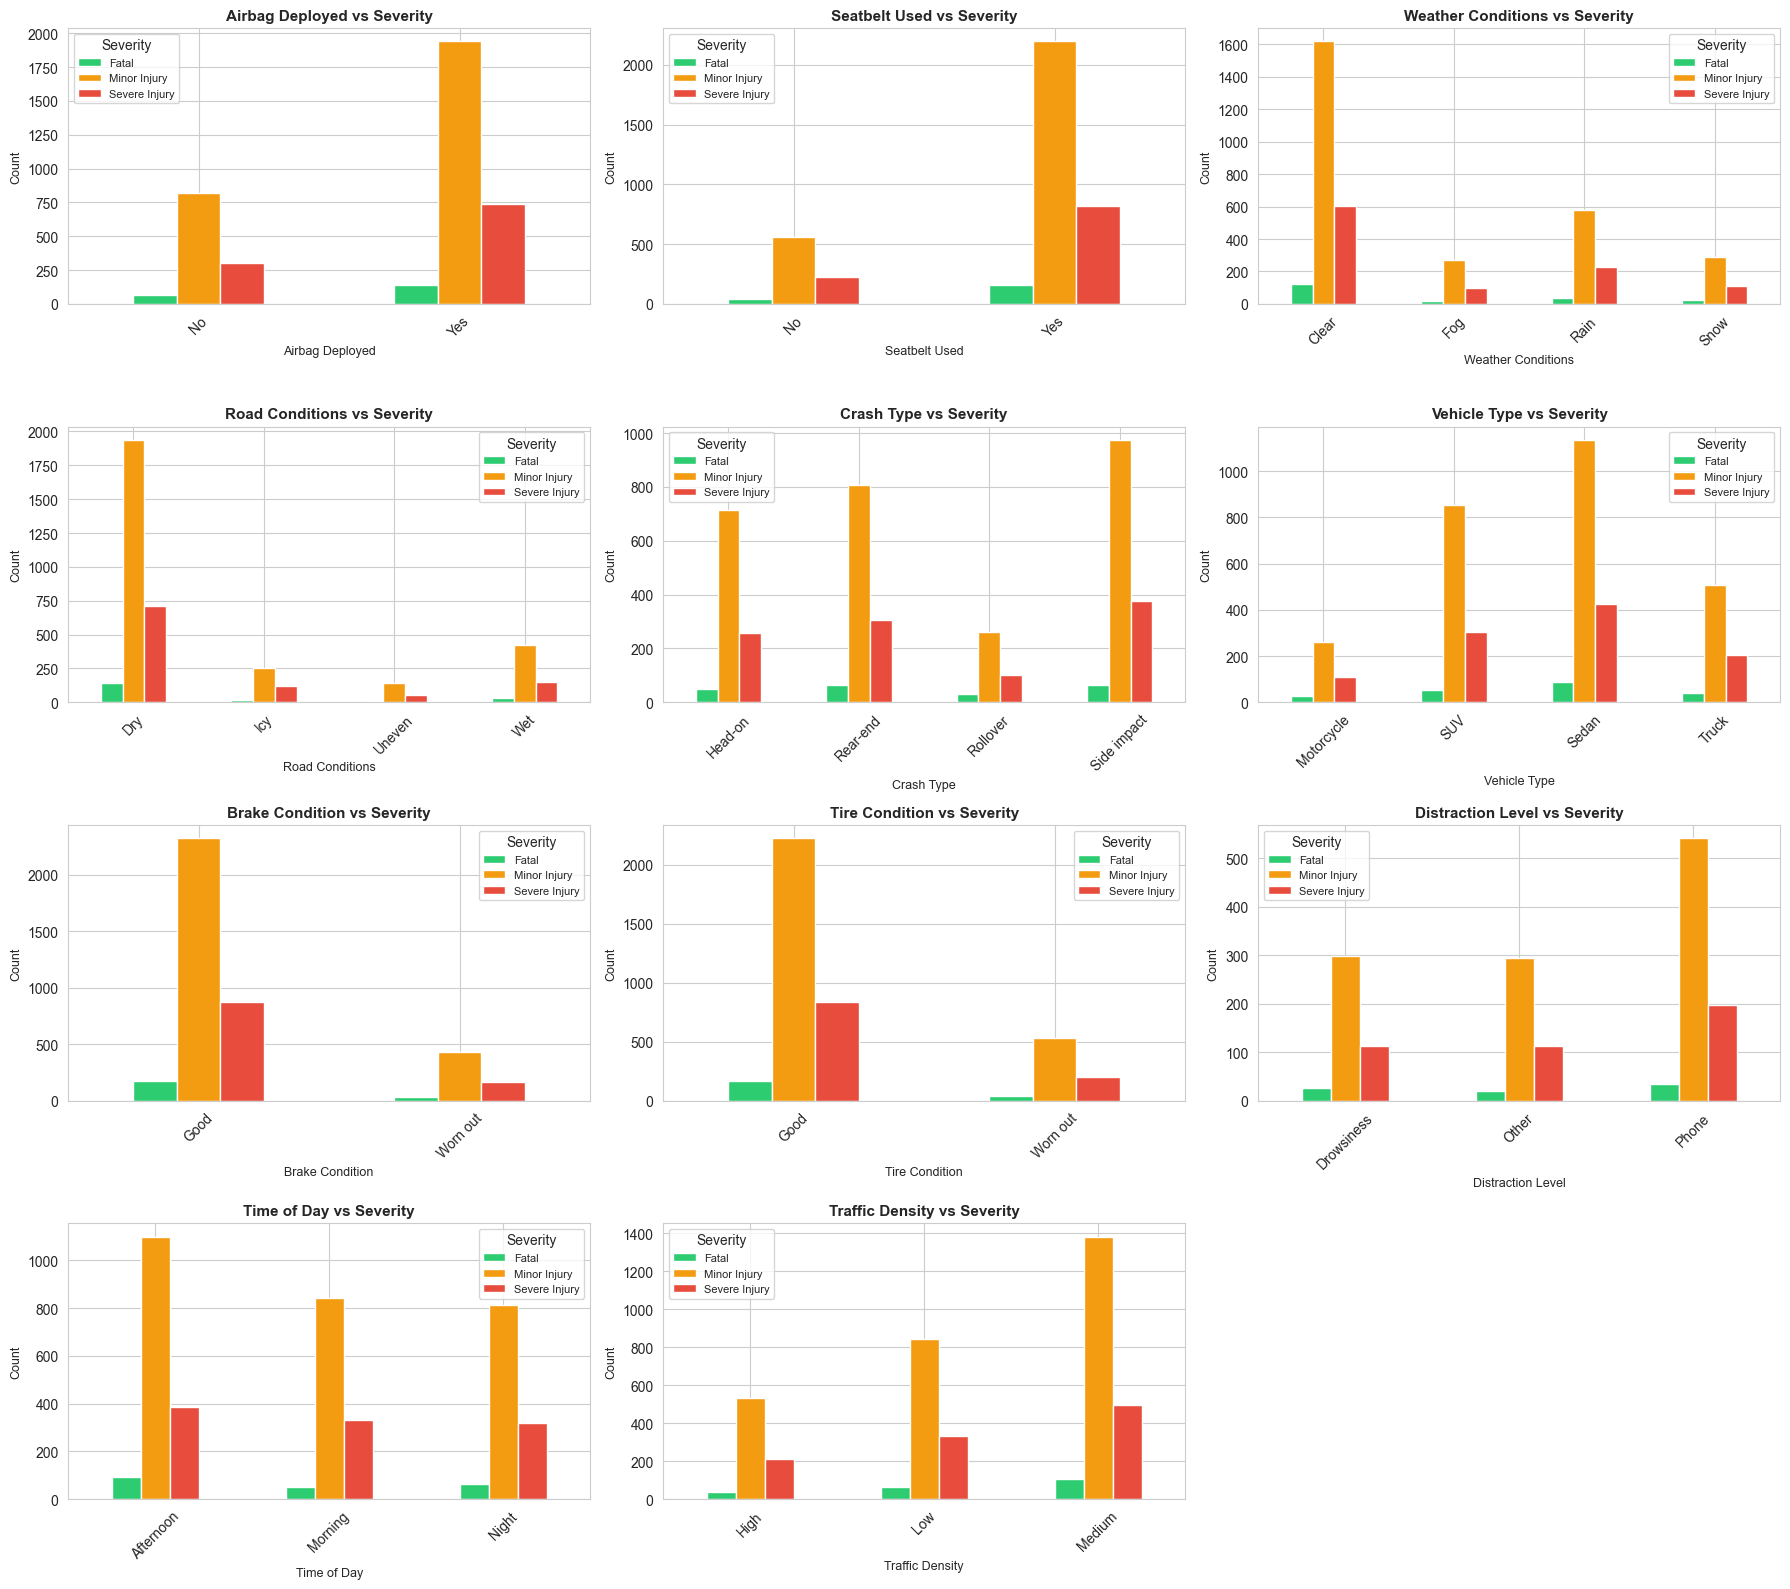

In [369]:
# Categorical features vs Severity
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

# Bar charts of categorical features grouped by Severity
for idx, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(data[col], data['Severity'])
    cross_tab.plot(kind='bar', ax=axes[idx], stacked=False, 
                   color=['#2ecc71', '#f39c12', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Severity', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Count', fontsize=9)
    axes[idx].legend(title='Severity', fontsize=8)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove extra subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# 4. DATA CLEANING & PREPROCESSING

In [252]:
# Import necessary libraries for modeling
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

#### LOAD DATA

In [300]:
# Load training and testing datasets
# Load the dataset from a URL or local path
# "https://github.com/PAIshanMadusha/car-crash-severity-prediction-model/blob/development/dataset/car_crash_train.csv"
# "https://github.com/PAIshanMadusha/car-crash-severity-prediction-model/blob/development/dataset/car_crash_test.csv"
# or
train_data = pd.read_csv("../dataset/car_crash_train.csv", encoding="latin-1")
test_data = pd.read_csv("../dataset/car_crash_test.csv", encoding="latin-1")

print(f"Train: {train_data.shape}, Test: {test_data.shape}")

Train: (4000, 19), Test: (1000, 19)


#### PREPROCESSING

In [301]:
# Preprocessing function for both train and test datasets
def preprocess(data):

    # Create a copy of the dataset
    df = data.copy()
    
    # Missing value imputation for 'Distraction Level'
    if 'Distraction Level' in df.columns:
        if df['Distraction Level'].isna().all():
            # If all values are missing, fill with 'Other'
            df['Distraction Level'] = df['Distraction Level'].fillna('Other')
        else:
            # Fill missing values with mode
            df['Distraction Level'] = df['Distraction Level'].fillna(
                df['Distraction Level'].mode().iloc[0]
            )

    # Ensure categorical columns are string type
    for col in df.select_dtypes(include=['category']).columns:
        df[col] = df[col].astype('str')
    
    # Binary encoding for 'Airbag Deployed' and 'Seatbelt Used'
    df['Airbag Deployed'] = df['Airbag Deployed'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['Seatbelt Used'] = df['Seatbelt Used'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    return df

In [302]:
# Apply preprocessing to both train and test datasets
train_processed = preprocess(train_data)
test_processed = preprocess(test_data)

print("\nPreprocessing completed successfully!")


Preprocessing completed successfully!


# 5. FEATURE ENCODING & TRANSFORMATION

#### ORDINAL ENCODING

In [303]:
# Define ordinal category order
Weather_Conditions = ['Clear', 'Rain', 'Fog', 'Snow']
Road_Conditions = ['Dry', 'Wet', 'Icy', 'Uneven']
Brake_Condition = ['Good', 'Worn out']
Tire_Condition = ['Good', 'Worn out']
Distraction_Level = ['Other', 'Phone', 'Drowsiness']
Traffic_Density = ['Low', 'Medium', 'High']

In [304]:
# Initialize OrdinalEncoder with defined categories
encoder = OrdinalEncoder(
    categories=[
        Weather_Conditions, Road_Conditions, Brake_Condition, 
        Tire_Condition, Distraction_Level, Traffic_Density
    ],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

# List of ordinal features to encode
ordinal_features = [
    'Weather Conditions', 'Road Conditions', 'Brake Condition', 
    'Tire Condition', 'Distraction Level', 'Traffic Density'
]

# Fit encoder on combined train and test data for ordinal features
# Avoid unseen categories during transformation
combined = pd.concat([
    train_processed[ordinal_features],
    test_processed[ordinal_features]
])

# Fit encoder on combined data
encoder.fit(combined)

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute.","[['Clear', 'Rain', ...], ['Dry', 'Wet', ...], ...]"
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'use_encoded_value'}, default='error'When set to 'error' an error will be raised in case an unknowncategorical feature is present during transform. When set to'use_encoded_value', the encoded value of unknown categories will beset to the value given for the parameter `unknown_value`. In:meth:`inverse_transform`, an unknown category will be denoted as None... versionadded:: 0.24",'use_encoded_value'
,"unknown_value unknown_value: int or np.nan, default=NoneWhen the parameter handle_unknown is set to 'use_encoded_value', thisparameter is required and will set the encoded value of unknowncategories. It has to be distinct from the values used to encode any ofthe categories in `fit`. If set to np.nan, the `dtype` parameter mustbe a float dtype... versionadded:: 0.24",-1
,"encoded_missing_value encoded_missing_value: int or np.nan, default=np.nanEncoded value of missing categories. If set to `np.nan`, then the `dtype`parameter must be a float dtype... versionadded:: 1.1",nan
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None
,"max_categories max_categories: int, default=NoneSpecifies an upper limit to the number of output categories for each inputfeature when considering infrequent categories. If there are infrequentcategories, `max_categories` includes the category representing theinfrequent categories along with the frequent categories. If `None`,there is no limit to the number of output features.`max_categories` do **not** take into account missing or unknowncategories. Setting `unknown_value` or `encoded_missing_value` to aninteger will increase the number of unique integer codes by one each.This can result in up to `max_categories + 2` integer codes... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None


In [305]:
# Transform ordinal features in both train and test datasets
train_processed[ordinal_features] = encoder.transform(train_processed[ordinal_features])
test_processed[ordinal_features] = encoder.transform(test_processed[ordinal_features])

#### LABEL ENCODING

In [306]:
# Initialize LabelEncoder for nominal features
le = LabelEncoder()
remaining_features = ['Vehicle Type', 'Time of Day', 'Crash Type']

In [307]:
# Fit and transform remaining nominal features
for feature in remaining_features:
    combined = pd.concat([train_processed[feature], test_processed[feature]])
    le.fit(combined)
    train_processed[feature] = le.transform(train_processed[feature])
    test_processed[feature] = le.transform(test_processed[feature])

print("\nEncoding completed successfully!")


Encoding completed successfully!


#### DATA PREPARATION

In [308]:
# Separate features and target variable from training data
X = train_processed.drop('Severity', axis=1)
y = train_processed['Severity']

# Encode target variable 'Severity'
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

In [309]:
# Define a simple check for data leakage
print(f"\nLeakage Check: X has {len(X)} rows. Train has {len(train_data)} rows.")
if len(X) == len(train_data):
    print("No leakage: Using train data only!")
elif len(X) == len(train_data) + len(test_data):
    print("Leakage detected: Using train + test combined!")


Leakage Check: X has 4000 rows. Train has 4000 rows.
No leakage: Using train data only!


#### DATA BALANCING USING SMOTE

In [310]:
print("\nBefore SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("\nAfter SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({np.int64(1): 2756, np.int64(2): 1038, np.int64(0): 206})

After SMOTE: Counter({np.int64(1): 2756, np.int64(2): 2756, np.int64(0): 2756})


# 6. TRAIN / TEST SPLIT

In [311]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)

print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 6614, Test size: 1654


# 7. MODEL TRAINING (RF / GB / XGB / NN)

In [312]:
# Initialize models to evaluate
models = {}

In [313]:
# Train Random Forest Classifier
print("\n[1/4] Training Random Forest...")

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
models['Random Forest'] = rf

print("Random Forest training completed!")


[1/4] Training Random Forest...
Random Forest training completed!


In [314]:
# Train Gradient Boosting Classifier
print("\n[2/4] Training Gradient Boosting...")
gb = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb
print("Gradient Boosting training completed!")


[2/4] Training Gradient Boosting...
Gradient Boosting training completed!


In [315]:
# Train XGBoost Classifier
print("\n[3/4] Training XGBoost...")
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
models['XGBoost'] = xgb
print("XGBoost training completed!")


[3/4] Training XGBoost...
XGBoost training completed!


In [316]:
# Train Neural Network Classifier
print("\n[4/4] Training Neural Network...")
nn = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=64,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=25,
    random_state=42
)
nn.fit(X_train, y_train)
models['Neural Network'] = nn
print("Neural Network training completed!")
print("\nAll models trained successfully!")


[4/4] Training Neural Network...
Neural Network training completed!

All models trained successfully!


# 8. MODEL EVALUATION & COMPARISON

#### CLASSIFICATION REPORT & ACCURACY

In [319]:
# Evaluate each model and display results
severity_labels = ['Minor Injury', 'Severe Injury', 'Fatal']
results = []

# Loop through each trained model for evaluation
for name, model in models.items():
    print(f"{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Accuracy calculation
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})
    
    print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=severity_labels, zero_division=0))

Random Forest

Accuracy: 0.8277 (82.77%)

Classification Report:
               precision    recall  f1-score   support

 Minor Injury       0.93      0.93      0.93       551
Severe Injury       0.72      0.94      0.81       551
        Fatal       0.89      0.62      0.73       552

     accuracy                           0.83      1654
    macro avg       0.84      0.83      0.82      1654
 weighted avg       0.84      0.83      0.82      1654

Gradient Boosting

Accuracy: 0.8652 (86.52%)

Classification Report:
               precision    recall  f1-score   support

 Minor Injury       0.98      0.97      0.97       551
Severe Injury       0.75      0.91      0.83       551
        Fatal       0.89      0.72      0.80       552

     accuracy                           0.87      1654
    macro avg       0.87      0.87      0.86      1654
 weighted avg       0.87      0.87      0.86      1654

XGBoost

Accuracy: 0.8501 (85.01%)

Classification Report:
               precision    rec

#### CONFUSION MATRIX VISUALIZATION


Confusion Matrix: Random Forest


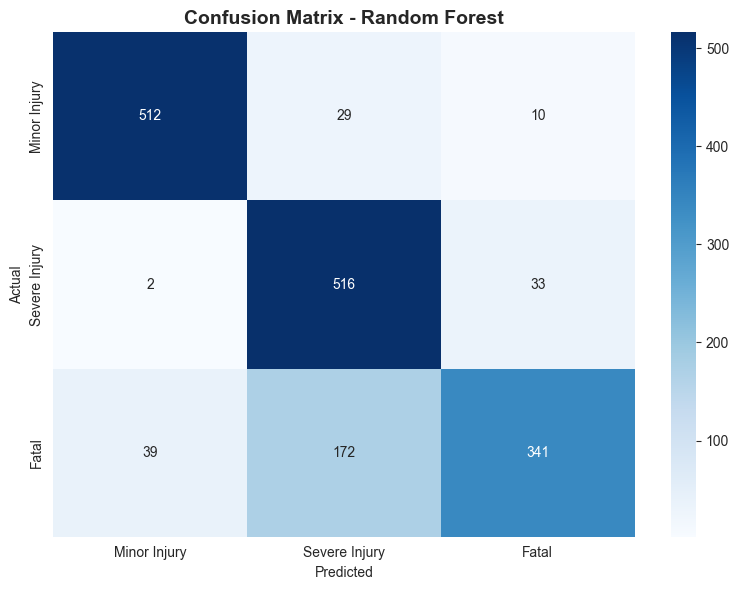


Confusion Matrix: Gradient Boosting


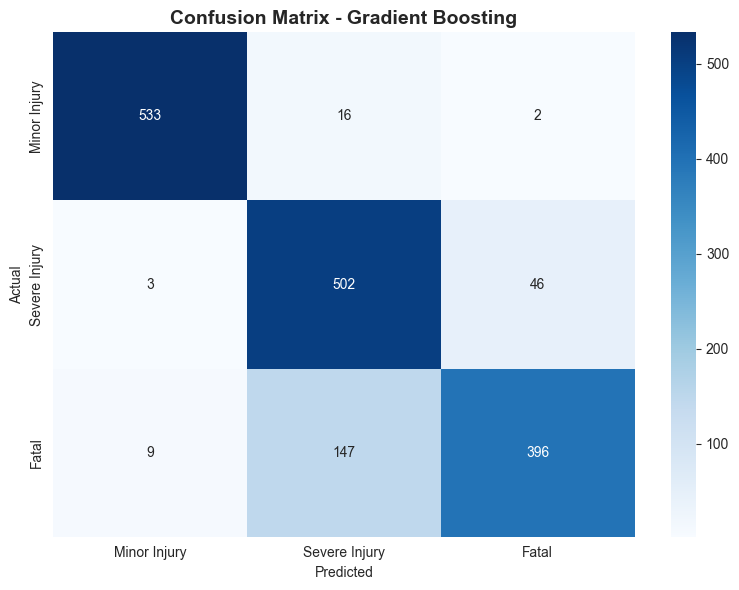


Confusion Matrix: XGBoost


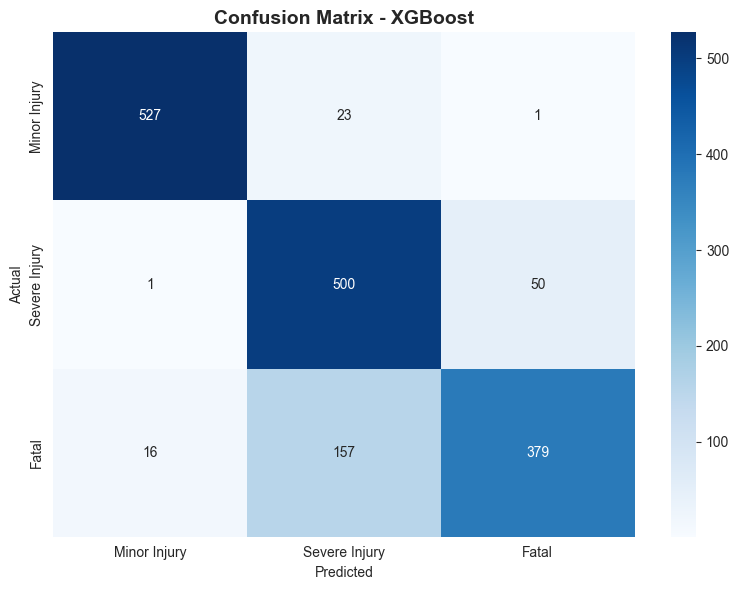


Confusion Matrix: Neural Network


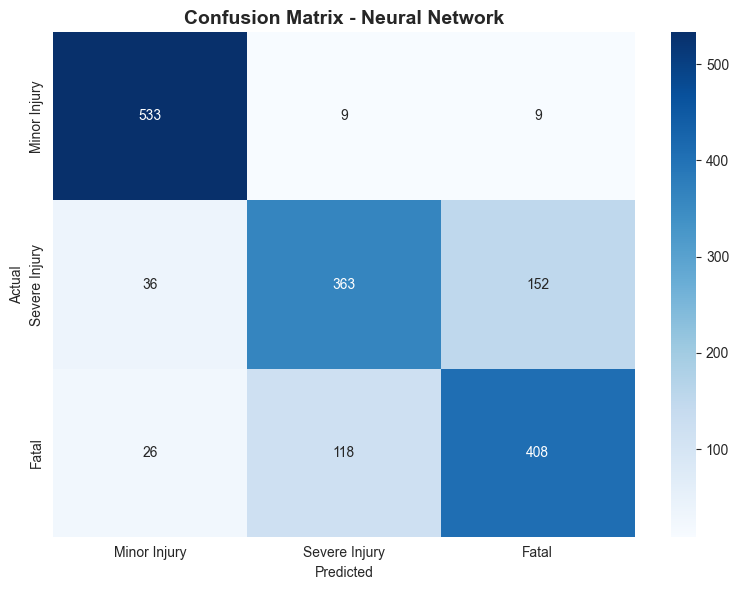

In [320]:
# Plot confusion matrix for each model
for name, model in models.items():
    print(f"\nConfusion Matrix: {name}")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=severity_labels, yticklabels=severity_labels)
    plt.title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

#### FINAL RESULTS

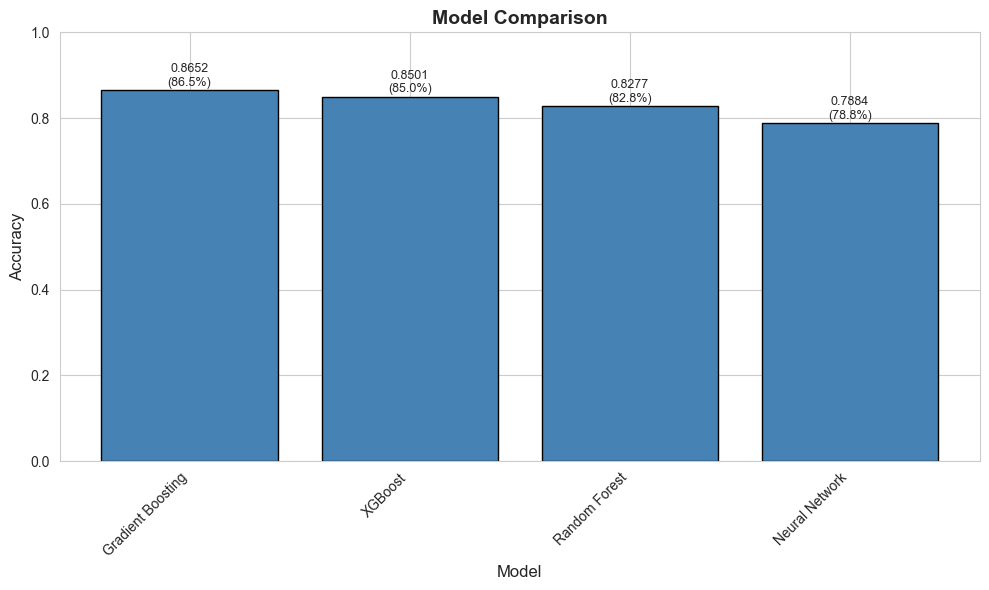


BEST MODEL: Gradient Boosting
ACCURACY: 0.8652 (86.52%)


In [321]:
# Summarize and visualize model performance
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

# Visualization of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='steelblue', edgecolor='black')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])

# Annotate bars with accuracy values
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}\n({v*100:.1f}%)', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

best_model = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\nBEST MODEL: {best_model}")
print(f"ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

#### FEATURE IMPORTANCE ANALYSIS


Top 12 Most Important Features:
                      Feature  Importance
17    Visibility Distance (m)    0.121446
16            Traffic Density    0.092705
1      Impact Angle (degrees)    0.089332
0          Crash Speed (km/h)    0.087507
4          Weather Conditions    0.080238
13       Alcohol Level (BAC%)    0.073312
11                 Driver Age    0.064842
12  Driver Experience (years)    0.062073
6                  Crash Type    0.054194
8         Vehicle Age (years)    0.047839
5             Road Conditions    0.047129
14          Distraction Level    0.037321


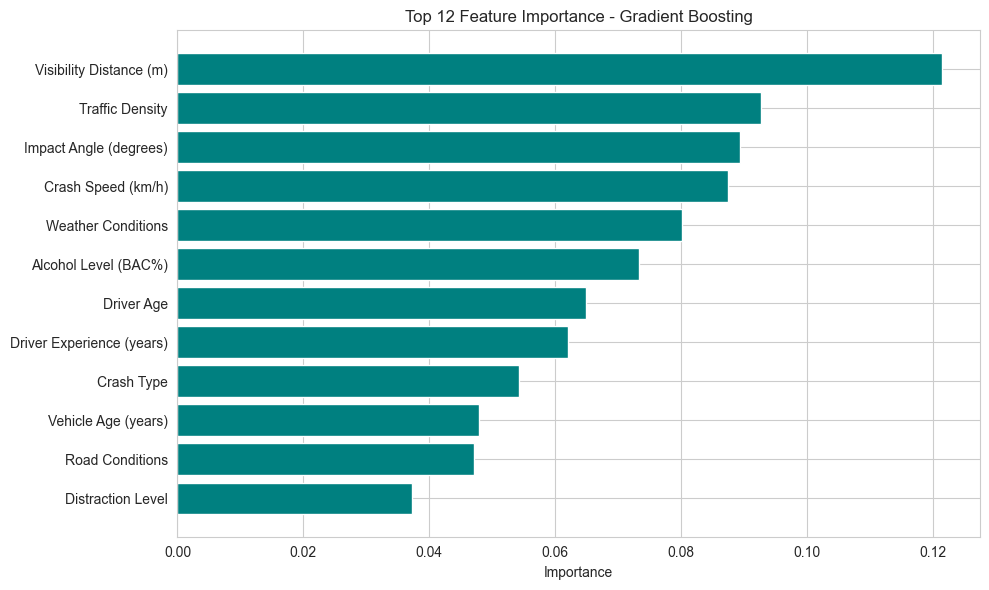

In [323]:
# Feature importance from the best model (assuming it's Gradient Boosting here)
if hasattr(gb, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': gb.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 12 Most Important Features:")
    print(importance_df.head(12))
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    top_10 = importance_df.head(12)
    plt.barh(range(len(top_10)), top_10['Importance'], color='teal')
    plt.yticks(range(len(top_10)), top_10['Feature'])
    plt.xlabel('Importance')
    plt.title('Top 12 Feature Importance - Gradient Boosting')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# 9. SAVE BEST MODEL

In [324]:
# Save the best model to disk
import pickle

In [325]:
# Get best model
#best_model_name = results_df.iloc[0]['Model']
# Or
# Select any model
#best_model_name = 'Random Forest'
#best_model_name = 'Gradient Boosting'
#best_model_name = 'XGBoost'
best_model_name = 'Neural Network'
best_model = models[best_model_name]

# Ordinal features used for prediction
ordinal_features_for_prediction = [
    'Weather Conditions', 'Road Conditions', 'Brake Condition', 'Tire Condition', 'Distraction Level',
    'Traffic Density'
]

# Create label encoders for remaining nominal features
label_encoders = {}
for feature in remaining_features:
    le = LabelEncoder()
    le.fit(train_processed[feature])
    label_encoders[feature] = le

# Get feature order (model input order)
feature_order = X.columns.tolist()

# Save model package
model_package = {
    'model': best_model,
    'model_name': best_model_name,
    'ordinal_encoder': encoder,
    'label_encoders': label_encoders,
    'y_encoder': y_encoder, 
    'ordinal_features': ordinal_features_for_prediction,
    'remaining_features': remaining_features,
    'feature_order': feature_order
}

# Save to disk
with open('best_crash_severity_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print(f"\nBest model ({best_model_name}) saved successfully!")


Best model (Neural Network) saved successfully!


# 10. KAGGLE SUBMISSION PREDICTION FUNCTION

In [336]:
# Function to create Kaggle submission with correct IDs
def create_kaggle_submission_with_correct_ids(model_path, train_csv, test_csv, sample_submission_csv):
    
    # Load model
    print("Loading model...")
    with open(model_path, 'rb') as f:
        package = pickle.load(f)
    
    # Extract components from the package
    model = package['model']
    ordinal_encoder = package['ordinal_encoder']
    label_encoders = package['label_encoders']
    y_encoder = package['y_encoder']
    ordinal_features = package['ordinal_features']
    remaining_features = package['remaining_features']
    feature_order = package['feature_order']
    
    # Load sample submission to get correct IDs
    print("Loading sample submission for IDs...")
    sample_sub = pd.read_csv(sample_submission_csv)
    correct_ids = sample_sub['ID'].copy()
    print(f"Found {len(correct_ids)} IDs from Kaggle")
    
    # Load train and test data
    print("Loading train and test data...")
    train_data = pd.read_csv(train_csv, encoding='latin-1')
    test_data = pd.read_csv(test_csv, encoding='latin-1')

    # Combine train and test data
    combined = pd.concat([train_data, test_data], ignore_index=True)
    print(f"Combined data: {combined.shape}")
    
    # Preprocess combined data
    print("Preprocessing...")
    combined_processed = preprocess(combined)
    combined_processed = combined_processed.drop(columns=['Severity'], errors='ignore')
    
    # Encode features
    combined_processed[ordinal_features] = ordinal_encoder.transform(
        combined_processed[ordinal_features]
    )
    
    # Encode remaining nominal features
    for feature in remaining_features:
        le = label_encoders[feature]
        combined_processed[feature] = combined_processed[feature].map(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )
    
    # Ensure feature order
    combined_processed = combined_processed[feature_order]
    
    # Make predictions
    print("Making predictions...")
    preds = model.predict(combined_processed)
    preds_labels = y_encoder.inverse_transform(preds)
    
    # Create submission with correct IDs
    submission = pd.DataFrame({
        'ID': correct_ids,
        'Predicted_Severity': preds_labels
    })

    print(f"Submission ready: {submission.shape}")
    return submission

In [337]:
# Create Kaggle submission with correct IDs
# Paths can be modified as needed
submission = create_kaggle_submission_with_correct_ids(
    model_path='../model/best_crash_severity_model.pkl',
    train_csv='../dataset/car_crash_train.csv',
    test_csv='../dataset/car_crash_test.csv',
    sample_submission_csv='../dataset/sample_submission.csv'
)

submission.to_csv('kaggle_submission_final.csv', index=False)
print("Saved: kaggle_submission_final.csv")

Loading model...
Loading sample submission for IDs...
Found 5000 IDs from Kaggle
Loading train and test data...
Combined data: (5000, 19)
Preprocessing...
Making predictions...
Submission ready: (5000, 2)
Saved: kaggle_submission_final.csv


# 11. MODEL TEST FUNCTION

In [371]:
# Function to predict crash severity for new input data
def predict_crash_severity(model_path, input_data, return_probabilities=True):
    
    # Load model package
    with open(model_path, 'rb') as f:
        package = pickle.load(f)
    
    # Extract components from the package
    model = package['model']
    ordinal_encoder = package['ordinal_encoder']
    label_encoders = package['label_encoders']
    y_encoder = package['y_encoder']
    ordinal_features = package['ordinal_features']
    remaining_features = package['remaining_features']
    feature_order = package['feature_order']
    
    # Convert input data to DataFrame
    df = pd.DataFrame([input_data])
    
    # Preprocess input data
    df_processed = preprocess(df) 
    
    # Drop target column if present
    df_processed = df_processed.drop(columns=['Severity'], errors='ignore')
    
    # Encode ordinal features
    df_processed[ordinal_features] = ordinal_encoder.transform(
        df_processed[ordinal_features]
    )
    
    # Encode remaining nominal features
    for feature in remaining_features:
        le = label_encoders[feature]
        df_processed[feature] = df_processed[feature].map(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )
    
    # Ensure feature order
    df_processed = df_processed[feature_order]
    
    # Make prediction
    prediction_encoded = model.predict(df_processed)[0]
    prediction_label = y_encoder.inverse_transform([prediction_encoded])[0]
    
    # Prepare result
    result = {
        'prediction': prediction_label,
        'prediction_encoded': int(prediction_encoded)
    }
    
    # Get probabilities if requested
    if return_probabilities and hasattr(model, 'predict_proba'):

        # Get prediction probabilities
        probabilities = model.predict_proba(df_processed)[0]

        # Create probability dictionary
        prob_dict = {
            severity: float(prob) 
            for severity, prob in zip(y_encoder.classes_, probabilities)
        }

        # Add probabilities to result
        result['probabilities'] = prob_dict
        
        # Determine risk level
        max_prob = max(probabilities)

        # Simple risk level determination based on prediction and probability
        if prediction_label == 'Fatal' or max_prob > 0.7:
            result['risk_level'] = 'High'
        elif prediction_label == 'Severe Injury' or max_prob > 0.5:
            result['risk_level'] = 'Medium'
        else:
            result['risk_level'] = 'Low'
    
    return result

#### TEST CASE 1

In [372]:
# Example test case for prediction
test_case_1 = {
    'Crash Speed (km/h)': 45,
    'Impact Angle (degrees)': 20,
    'Airbag Deployed': 'Yes',
    'Seatbelt Used': 'Yes',
    'Weather Conditions': 'Clear',
    'Road Conditions': 'Dry',
    'Crash Type': 'Rear-end',
    'Vehicle Type': 'Sedan',
    'Vehicle Age (years)': 3,
    'Brake Condition': 'Good',
    'Tire Condition': 'Good',
    'Driver Age': 35,
    'Driver Experience (years)': 15,
    'Alcohol Level (BAC%)': 0.0,
    'Distraction Level': None,
    'Time of Day': 'Afternoon',
    'Traffic Density': 'Medium',
    'Visibility Distance (m)': 400
}

try:
    # Function call to predict crash severity
    result_1 = predict_crash_severity('../model/best_crash_severity_model.pkl', test_case_1)
    
    print(f"\nPrediction: {result_1['prediction']}")
    print(f"Risk Level: {result_1['risk_level']}")
    print(f"\nProbabilities:")
    for severity, prob in result_1['probabilities'].items():
        bar = '█' * int(prob * 50)
        print(f"   {severity:15s}: {prob:6.2%} {bar}") 
        
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()


Prediction: Severe Injury
Risk Level: Medium

Probabilities:
   Fatal          :  0.98% 
   Minor Injury   : 44.74% ██████████████████████
   Severe Injury  : 54.28% ███████████████████████████


#### TEST CASE 2

In [373]:
# Another test case for prediction
test_case_2 = {
    'Crash Speed (km/h)': 150,
    'Impact Angle (degrees)': 85,
    'Airbag Deployed': 'No',
    'Seatbelt Used': 'No',
    'Weather Conditions': 'Fog',
    'Road Conditions': 'Icy',
    'Crash Type': 'Head-on',
    'Vehicle Type': 'Motorcycle',
    'Vehicle Age (years)': 15,
    'Brake Condition': 'Worn out',
    'Tire Condition': 'Worn out',
    'Driver Age': 22,
    'Driver Experience (years)': 1,
    'Alcohol Level (BAC%)': 0.12,
    'Distraction Level': 'Phone',
    'Time of Day': 'Night',
    'Traffic Density': 'Low',
    'Visibility Distance (m)': 50
}

try:
    # Function call to predict crash severity
    result_2 = predict_crash_severity('../model/best_crash_severity_model.pkl', test_case_2)
    
    print(f"\nPrediction: {result_2['prediction']}")
    print(f"Risk Level: {result_2['risk_level']}")
    print(f"\nProbabilities:")
    for severity, prob in result_2['probabilities'].items():
        bar = '█' * int(prob * 50)
        print(f"   {severity:15s}: {prob:6.2%} {bar}")
        
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()


Prediction: Minor Injury
Risk Level: High

Probabilities:
   Fatal          :  0.00% 
   Minor Injury   : 100.00% █████████████████████████████████████████████████
   Severe Injury  :  0.00% 


#### TEST CASE 3

In [374]:
# A third test case for prediction
test_case_3 = {
    'Crash Speed (km/h)': 95,
    'Impact Angle (degrees)': 50,
    'Airbag Deployed': 'Yes',
    'Seatbelt Used': 'No',
    'Weather Conditions': 'Rain',
    'Road Conditions': 'Wet',
    'Crash Type': 'Side impact',
    'Vehicle Type': 'SUV',
    'Vehicle Age (years)': 7,
    'Brake Condition': 'Good',
    'Tire Condition': 'Worn out',
    'Driver Age': 55,
    'Driver Experience (years)': 25,
    'Alcohol Level (BAC%)': 0.04,
    'Distraction Level': 'Drowsiness',
    'Time of Day': 'Morning',
    'Traffic Density': 'High',
    'Visibility Distance (m)': 200
}

try:
    # Function call to predict crash severity
    result_3 = predict_crash_severity('../model/best_crash_severity_model.pkl', test_case_3)
    
    print(f"\nPrediction: {result_3['prediction']}")
    print(f"Risk Level: {result_3['risk_level']}")
    print(f"\nProbabilities:")
    for severity, prob in result_3['probabilities'].items():
        bar = '█' * int(prob * 50)
        print(f"   {severity:15s}: {prob:6.2%} {bar}")
        
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()


Prediction: Severe Injury
Risk Level: High

Probabilities:
   Fatal          :  0.01% 
   Minor Injury   :  0.70% 
   Severe Injury  : 99.29% █████████████████████████████████████████████████


# ✅ END OF MODEL DEVELOPMENT